<img src = 'Monte Carlo.png'/>

## Импорт библиотек

In [1]:
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')

## Задаю исходные переменные

In [2]:
ead_A, ead_B, ead_C = 1000, 2000, 2500
pd_mean_A, pd_mean_B, pd_mean_C = 0.02, 0.01, 0.015
pd_sigma_A, pd_sigma_B, pd_sigma_C = 0.007, 0.005, 0.01
lgd_min_A, lgd_min_B, lgd_min_C = 0, 0, 0
lgd_mode_A, lgd_mode_B, lgd_mode_C = 0.2, 0.3, 0.4
lgd_max_A, lgd_max_B, lgd_max_C = 1, 1, 1
n = 50000

## Функция для beta-pert распределения

In [3]:
def pert_distribution(min_val, mode_val, max_val, size=1, lamb=4):
    alpha = 1 + lamb * (mode_val - min_val) / (max_val - min_val)
    beta = 1 + lamb * (max_val - mode_val) / (max_val - min_val)
    return np.random.beta(alpha, beta, size) * (max_val - min_val) + min_val

## Моделирую PD

In [4]:
pd_A = np.random.lognormal(mean=np.log(pd_mean_A), sigma=pd_sigma_A, size=n)
pd_B = np.random.lognormal(mean=np.log(pd_mean_B), sigma=pd_sigma_B, size=n)
pd_C = np.random.lognormal(mean=np.log(pd_mean_C), sigma=pd_sigma_C, size=n)

## Моделирую LGD

In [5]:
lgd_A = pert_distribution(lgd_min_A, lgd_mode_A, lgd_max_A, size=n)
lgd_B = pert_distribution(lgd_min_B, lgd_mode_B, lgd_max_B, size=n)
lgd_C = pert_distribution(lgd_min_C, lgd_mode_C, lgd_max_C, size=n)

## Рассчитываю EL

In [6]:
el_A = ead_A * pd_A * lgd_A
el_B = ead_B * pd_B * lgd_B
el_C = ead_C * pd_C * lgd_C

## Общий EL

In [7]:
total_el = el_A + el_B + el_C

## 95 процентный перцентиль

In [8]:
percentile_95 = np.percentile(total_el, 95)

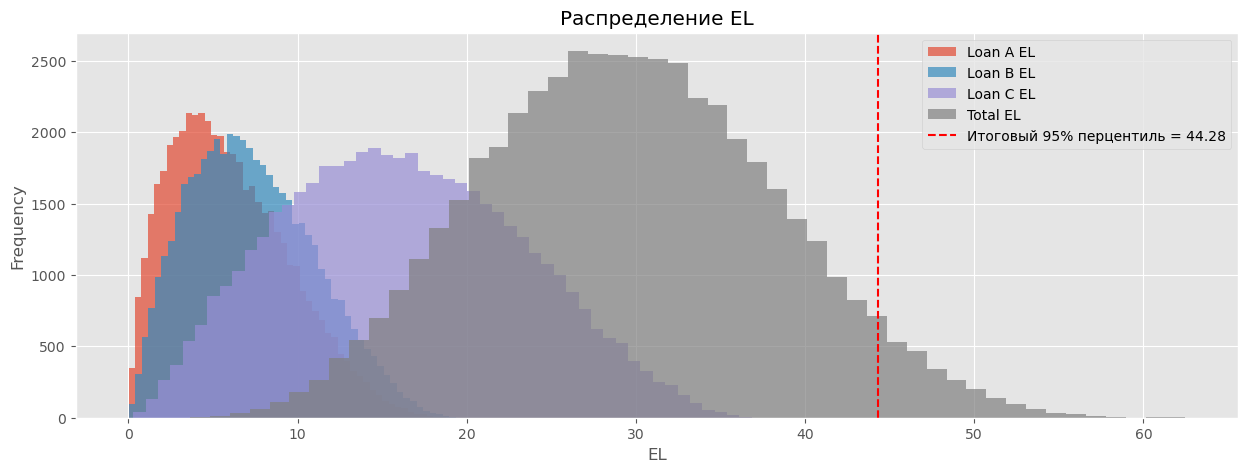

Итоговый 95 Процентный перцентиль: 44.28


In [9]:
plt.figure(figsize=(15, 5))
plt.hist(el_A, bins=50, alpha=0.7, label='Loan A EL')
plt.hist(el_B, bins=50, alpha=0.7, label='Loan B EL')
plt.hist(el_C, bins=50, alpha=0.7, label='Loan C EL')
plt.hist(total_el, bins=50, alpha=0.7, color='grey', label='Total EL')
plt.axvline(percentile_95, color='red', linestyle='--', label=f'Итоговый 95% перцентиль = {percentile_95:.2f}')
plt.legend()
plt.title('Распределение EL')
plt.xlabel('EL')
plt.ylabel('Frequency')
plt.show()
print(f'Итоговый 95 Процентный перцентиль: {percentile_95:.2f}')